In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeOp-tech/DA-ML-Regression-Inference/master/datasets/scores_synth.csv?token=AHM3F3CTVHB7EXOP2QEU5MLAOWN7A")
print(data.shape)
data.head()

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1


In [10]:
data.corr()

,income,score,internet_connection
income,1.000000,0.655725,0.229461
score,0.655725,1.000000,0.286389
internet_connection,0.229461,0.286389,1.000000


Text(0.5, 0, 'income (in 1k euros)')

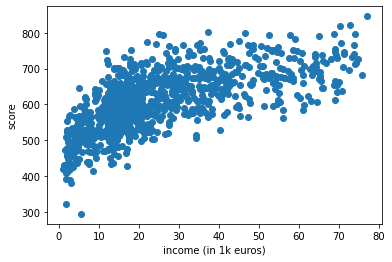

In [11]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

Let's draw a linear line across this scatter plot. 

In other words,
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$

In [29]:
Y = data['score']
X = data[['income']]

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [31]:
print('a is',lr.intercept_)
print('b is', lr.coef_)

a is 530.8912321292064
b is [3.1267463]


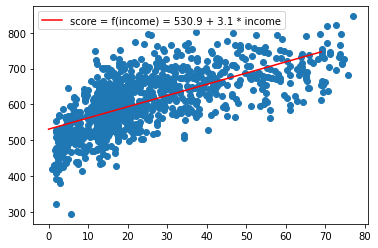

In [32]:
regression_function = lr.intercept_ + lr.coef_ * np.arange(70)
plt.scatter(data['income'], data['score'])
plt.plot(regression_function, color='r', 
         label=f'score = f(income) = {round(lr.intercept_, 1)} + {round(lr.coef_[0], 1)} * income')
plt.legend()

## Inference

One of the reasons why **linear regressions** are very popular despite its restrictive assumption on the functional form is due to their simplcity and **interpretability**. We will see how to treat non-linear relationships with a linear model in the next class.

 
Going back to the formulation: 
$$ y=f(x)=a+b*x$$
$$score = f(income)=a+b*income$$


How do we interpret this function?

In [22]:
from statsmodels.api import OLS
data['intercept'] = 1
ols = OLS(data['score'], data[['intercept', 'income','internet_connection']])
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     407.0
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          5.97e-130
Time:                        16:14:16   Log-Likelihood:                -5527.9
No. Observations:                1000   AIC:                         1.106e+04
Df Residuals:                     997   BIC:                         1.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             517.2306      4.115    125.700      0.000     509.156     525.305
income                  2.9698      0.115     25.797      0.000       2.744       3.196
internet_connection    25.4792      4.287      5.943      0.000      17.066      33.892
==============================================================================
Omnibus:                        0.277   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.871   Jarque-Bera (JB):                0.251
Skew:                           0.039   Prob(JB):                        0.882
Kurtosis:                       3.006   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficient
It's actually very simple... The impact of a variable in a linear model is constant across different values of that variable. Hence, we can state that for every 1.000 euro increase on students income we get on average (expectation) an increase of 4 points in score. Look again... do you see any issue with that 'functionality' of linear regression?

#### P_value: how accurate is the coefficient? 
The p value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.

#### Is the error term, or $\epsilon$, random?

Text(0.5, 0, 'fitted score')

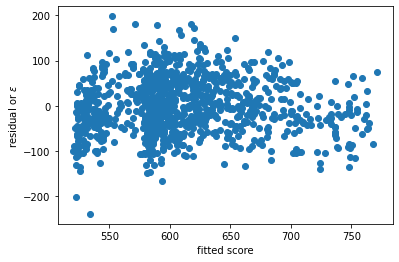

In [23]:
plt.scatter(results.fittedvalues, results.resid)
plt.ylabel('residual or $\epsilon$ ')
plt.xlabel('fitted score')

#### Is the error term, or $\epsilon$, normal?

(array([  2.,   1.,  24., 117., 239., 261., 213., 111.,  24.,   8.]),
 array([-239.23533333, -195.51978754, -151.80424176, -108.08869597,
         -64.37315019,  -20.65760441,   23.05794138,   66.77348716,
         110.48903295,  154.20457873,  197.92012451]),
 <BarContainer object of 10 artists>)

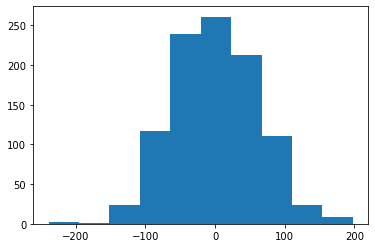

In [24]:
plt.hist(results.resid)